In [1]:
%cd /home/ubuntu/Qwen-Image-Edit-Angles

/home/ubuntu/Qwen-Image-Edit-Angles


In [2]:
from qwenimage.datamodels import QwenConfig
from qwenimage.finetuner import QwenLoraFinetuner
from qwenimage.foundation import QwenImageFoundation, QwenImageRegressionFoundation

foundation = QwenImageFoundation(QwenConfig(
    vae_image_size=1024 * 1024,
    regression_base_pipe_steps=4,
))

/usr/lib/python3/dist-packages/sklearn/utils/fixes.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version  # type: ignore
2025-11-26 21:46:33.753741: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-26 21:46:33.768248: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764193593.785713  184164 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN 

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

/home/ubuntu/.local/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.12) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Skipping import of cpp extensions due to incompatible torch version 2.9.1+cu128 for torchao version 0.14.1             Please see https://github.com/pytorch/ao/issues/2919 for more info
TMA benchmarks will be running without grid constant TMA descriptor.
ERROR:bitsandbytes.cextension:Could not load bitsandbytes native library: /lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.32' not found (required by /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cpu.so)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/bitsandbytes/cextension.py", line 85, in <module>
    lib = get_native_library()
  File "/usr/local/lib/python3.10/dist-packages/bitsandbytes/cextension.py", line 72, in get_native_library
    dll = ct.cdll.LoadLibrary(str(binary_path))
  File "/usr/lib/python3.10/ctypes/__init__.py", line 452, in LoadLibrary
    return self._dlltype(name)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._ha

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

self.device='cuda'


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
finetuner = QwenLoraFinetuner(foundation, foundation.config)
finetuner.load("/data/reg-mse-pixel-lpips_005000", lora_rank=32)

Loading Lora from /data/reg-mse-pixel-lpips_005000
original peft weights
└─ base_model.model
   ├─ img_in,proj_out,txt_in
   │  └─ lora_A,lora_B.weight
   ├─ norm_out.linear
   │  └─ lora_A,lora_B.weight
   ├─ time_text_embed.timestep_embedder
   │  └─ linear_1,linear_2
   │     └─ lora_A,lora_B.weight
   └─ transformer_blocks
      └─ [0–59]
         ├─ attn
         │  └─ add_k_proj,add_q_proj,add_v_proj,to_add_out,to_k,to_q,to_v
         │     └─ lora_A,lora_B.weight
         ├─ img_mlp,txt_mlp.net.0.proj
         │  └─ lora_A,lora_B.weight
         └─ img_mod,txt_mod.1
            └─ lora_A,lora_B.weight
adjusted peft weights
└─ base_model.model
   ├─ img_in,proj_out,txt_in
   │  └─ lora_A,lora_B.weight
   ├─ norm_out.linear
   │  └─ lora_A,lora_B.weight
   ├─ time_text_embed.timestep_embedder
   │  └─ linear_1,linear_2
   │     └─ lora_A,lora_B.weight
   └─ transformer_blocks
      └─ [0–59]
         ├─ attn
         │  └─ add_k_proj,add_q_proj,add_v_proj,to_add_out,to_k,to_q,to_v

In [ ]:
from qwenimage.experiments.experiments_qwen import PipeInputs

pipe_inputs = PipeInputs()
pipe_inputs[0]
from qwenimage.datamodels import QwenInputs

idx = 0
inps = QwenInputs(**pipe_inputs[idx])
inps.num_inference_steps = 4
inps.vae_image_override = 1024 * 1024
inps.latent_size_override = 1024 * 1024
finetuner.enable()
foundation.scheduler.config["base_shift"] = 2.5
foundation.scheduler.config["max_shift"] = 2.5
outs = foundation.base_pipe(inps)
outs[0]

In [4]:
from qwenimage.sources import EditingSource


src = EditingSource(
    data_dir="/data/CrispEdit",
    total_per=10,
)

<class 'qwenimage.sources.EditingSource'> of len17920


Transform this image into oil painting style
image=[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x7974445DFCA0>] prompt='Transform this image into oil painting style' height=None width=None negative_prompt=None true_cfg_scale=1.0 num_inference_steps=2 generator=<torch._C.Generator object at 0x797998e335b0> max_sequence_length=512 vae_image_override=1048576 latent_size_override=1048576
Time taken by QwenImageFoundation.offload_text_encoder: 1.8719583749771118e-06 seconds
Time taken by Preprocessing: 0.0390556501224637 seconds
_get_qwen_prompt_embeds, image
[<PIL.Image.Image image mode=RGB size=384x384 at 0x797444549840>]
{'input_ids': tensor([[151644,   8948,    198,  74785,    279,   1376,   4419,    315,    279,
           1946,   2168,    320,   3423,     11,   6083,     11,   1379,     11,
          10434,     11,   6171,     11,   4004,    701,   1221,  10339,   1246,
            279,   1196,    594,   1467,   7600,   1265,  11596,    476,   5602,
            

  0%|          | 0/2 [00:00<?, ?it/s]

Time taken by loop 0: 0.49761364911682904 seconds
Time taken by loop 1: 0.4977413050364703 seconds
Time taken by loop: 1.0029428200796247 seconds
Time taken by pre decode: 0.036916342098265886 seconds
Time taken by vae.decode: 0.07527082809247077 seconds
Time taken by post process: 0.10139526100829244 seconds
Time taken by offload: 0.02003038302063942 seconds
Time taken by QwenImageEditPlusPipeline.__call__: 1.459363718982786 seconds
image=[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x7974445DFCA0>] prompt='Transform this image into oil painting style' height=None width=None negative_prompt=None true_cfg_scale=1.0 num_inference_steps=2 generator=<torch._C.Generator object at 0x7974447a5690> max_sequence_length=512 vae_image_override=1048576 latent_size_override=1048576
Time taken by QwenImageFoundation.offload_text_encoder: 1.601874828338623e-06 seconds
Time taken by Preprocessing: 0.0379404139239341 seconds
_get_qwen_prompt_embeds, image
[<PIL.Image.Image image 

  0%|          | 0/2 [00:00<?, ?it/s]

Time taken by loop 0: 0.4026943810749799 seconds
Time taken by loop 1: 0.4410165960434824 seconds
Time taken by loop: 0.850474304985255 seconds
Time taken by pre decode: 0.0593622459564358 seconds
Time taken by vae.decode: 0.07591435895301402 seconds
Time taken by post process: 0.10187903698533773 seconds
Time taken by offload: 0.02019011997617781 seconds
Time taken by QwenImageEditPlusPipeline.__call__: 1.3297196389175951 seconds
image=[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x7974445DFCA0>] prompt='Transform this image into oil painting style' height=None width=None negative_prompt=None true_cfg_scale=1.0 num_inference_steps=50 generator=<torch._C.Generator object at 0x7974447e13d0> max_sequence_length=512 vae_image_override=1048576 latent_size_override=1048576
Time taken by QwenImageFoundation.offload_text_encoder: 1.6759149730205536e-06 seconds
Time taken by Preprocessing: 0.03758003702387214 seconds
_get_qwen_prompt_embeds, image
[<PIL.Image.Image image 

  0%|          | 0/50 [00:00<?, ?it/s]

Time taken by loop 0: 0.40347539098002017 seconds
Time taken by loop 1: 0.4426628351211548 seconds
Time taken by loop 2: 0.45488936407491565 seconds
Time taken by loop 3: 0.44317778502590954 seconds
Time taken by loop 4: 0.45213854196481407 seconds
Time taken by loop 5: 0.44745821692049503 seconds
Time taken by loop 6: 0.44888529391027987 seconds
Time taken by loop 7: 0.4494227848481387 seconds
Time taken by loop 8: 0.44679283001460135 seconds
Time taken by loop 9: 0.45105619402602315 seconds
Time taken by loop 10: 0.4436406949535012 seconds
Time taken by loop 11: 0.45217114104889333 seconds
Time taken by loop 12: 0.44852975592948496 seconds
Time taken by loop 13: 0.44982175389304757 seconds
Time taken by loop 14: 0.4473552559502423 seconds
Time taken by loop 15: 0.44964484008960426 seconds
Time taken by loop 16: 0.4497754769399762 seconds
Time taken by loop 17: 0.449542417190969 seconds
Time taken by loop 18: 0.44807495013810694 seconds
Time taken by loop 19: 0.4472591949161142 second

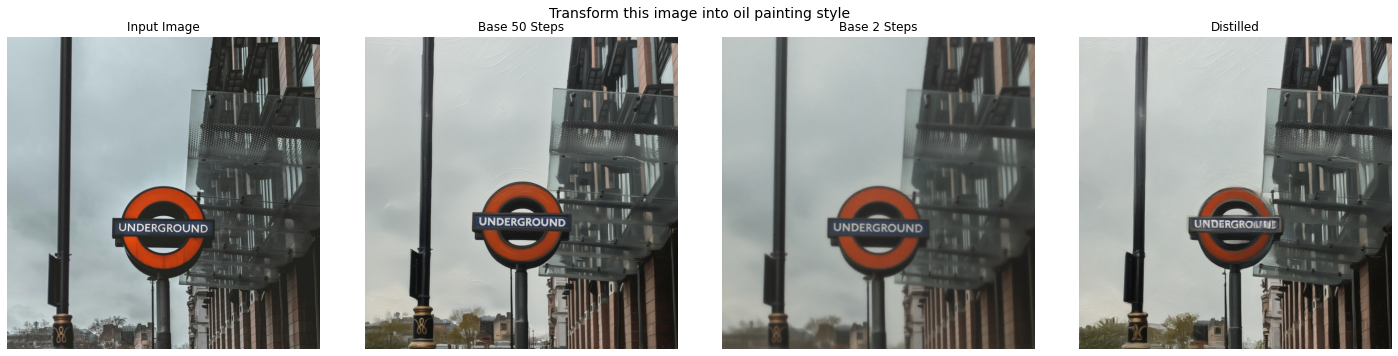

In [13]:
from transformers.image_utils import load_image
import matplotlib.pyplot as plt
import torch

from qwenimage.datamodels import QwenInputs

SEED = 67

idx = 15_310
text, _, image = src[idx]
print(text)

inps = QwenInputs(
    prompt = text,
    image = [image],

    # prompt="Turn the man into a goblin",
    # image=[load_image("/home/ubuntu/Qwen-Image-Edit-Angles/scripts/assets/media_images_sample_images_34141_02388e50bbd59c3efb75.png")],
    
    # prompt="Turn the background into a deep forest",
    # image=[load_image("/home/ubuntu/Qwen-Image-Edit-Angles/scripts/assets/media_images_sample_images_34141_02388e50bbd59c3efb75.png")],
    
    # prompt="Add a large hot air balloon to the center of the scene",
    # image=[load_image("/home/ubuntu/Qwen-Image-Edit-Angles/scripts/assets/wand-3270.png")],
    
    # prompt="Remove the little girl",
    # image=[load_image("/home/ubuntu/Qwen-Image-Edit-Angles/scripts/assets/test_images_v1/test_image_1.jpg")],
    
    # prompt="Turn the corn into two peaches, one on each hand",
    # image=[load_image("/home/ubuntu/Qwen-Image-Edit-Angles/scripts/assets/test_images_v1/test_image_5.jpg")],
    
    # prompt="Colorize the sketch to a painting of a forest",
    # image=[load_image("/home/ubuntu/Qwen-Image-Edit-Angles/scripts/assets/hK1XxQ0li9QS9AlhZitJI.jpeg")],
    
    # prompt="Remove the furniture and show an completely empty room interior",
    # image=[load_image("/home/ubuntu/Qwen-Image-Edit-Angles/scripts/assets/471419729_122147939600372575_2367375612828096747_n.jpg")],
    num_inference_steps = 2,
    vae_image_override = 1024 * 1024,
    latent_size_override = 1024 * 1024,
)

finetuner.enable()
foundation.scheduler.config["base_shift"] = 2.0
foundation.scheduler.config["max_shift"] = 2.0
inps.generator = torch.Generator().manual_seed(SEED)
outs_distill = foundation.base_pipe(inps)

finetuner.disable()
foundation.scheduler.config["base_shift"] = 0.5
foundation.scheduler.config["max_shift"] = 0.9
inps.generator = torch.Generator().manual_seed(SEED)
outs_base_2step = foundation.base_pipe(inps)

inps.num_inference_steps = 50
inps.generator = torch.Generator().manual_seed(SEED)
outs_base_50step = foundation.base_pipe(inps)



fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot input image
axes[0].imshow(inps.image[0])
axes[0].set_title("Input Image")
axes[0].axis('off')

# Plot base 50 step output
axes[1].imshow(outs_base_50step[0])
axes[1].set_title("Base 50 Steps")
axes[1].axis('off')

# Plot base 2 step output
axes[2].imshow(outs_base_2step[0])
axes[2].set_title("Base 2 Steps")
axes[2].axis('off')

# # Plot distilled output
axes[3].imshow(outs_distill[0])
axes[3].set_title("Distilled")
axes[3].axis('off')

# Set the prompt as the main title
fig.suptitle(inps.prompt, fontsize=14, wrap=True)

plt.tight_layout()
plt.show()
